In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [111]:
# some classification Algorithm
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 

# we also used the Encoding techniques so 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# this is for the evaluation purpose libraries 
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [3]:
data = pd.read_csv("german_credit_data.csv")

In [4]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


<b> Task
    
1-  You are required to perform exploratory data analysis on the following dataset.

2-	Plot as many charts and visuals to explain the data attributes and their nature.

3-	Find correlated variables and variables affecting the target variable the most.

4-	You are required to use the table below and implement all the classification algorithms studied in class.

5-	Assess accuracy, F1 Score and Precision recall, and suggest the best possible classification algorithm for your use case. Use classification report for tabulating results

6-	Change the hyper parameters of each algorithm tabulate the results.

7-	Describe impact of each feature on the target variable

8-	Explain your plots, reasons for using the plot, if there exists a problem (such as outliers) how did you solve it?

9-	Plot confusion matrix, ROC curves, learning and validation curves.

10- Does it have a class imbalance problem how did you solve it?



In [5]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
data.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [7]:
# droping the unwanted column from dataset
data.drop("Unnamed: 0", axis=1, inplace =True)

In [8]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
data.Risk.unique()

array(['good', 'bad'], dtype=object)

In [10]:
# our class variable
data.Risk.value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [11]:
# by using the info command we are getting the no of entries and features data type so as wee see that "saving accounts"
#and "checking acount" both have the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [12]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [13]:
data.shape

(1000, 10)

In [14]:
# after knowing the NAN values now  Removing NaN's from 'Saving accounts' and 'Checking account' column
data['Saving accounts']  =  data['Saving accounts'].fillna(value = 'NA')
data['Checking account'] =  data['Checking account'].fillna(value = 'NA')


In [15]:
# the reason wwe are not droping these columns are removing the null values because the no of null values
#if we remove this will effect on our output we have only (1000,2) samples that's why  iam assiging the NA value
data['Saving accounts'].value_counts()

little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [16]:
data['Checking account'].value_counts()

NA          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

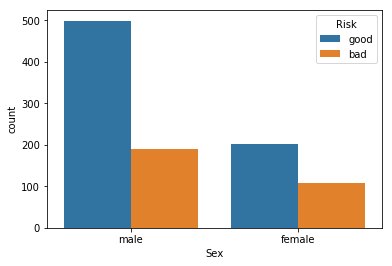

In [17]:
# Ploting the charts
# from the chart we can see the relationship and effect of Sex column to class variable from the chart
#it is very clear that most of the gender male is in a good risk then female 
sns.countplot(x = "Sex", data= data, hue ="Risk")

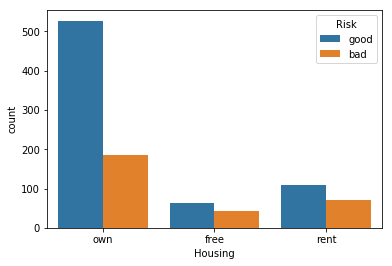

In [18]:
# As in our dataset housing data feature have three category and from the chart own house person's are in good risk. 
sns.countplot(x = "Housing", data= data, hue ="Risk")

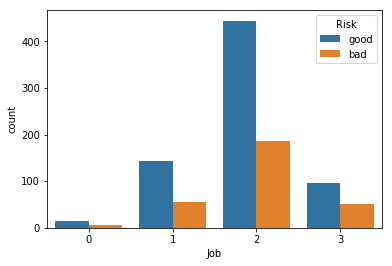

In [19]:
# Job also affecting factor to the target varaible
sns.countplot(x = "Job", data= data, hue ="Risk")

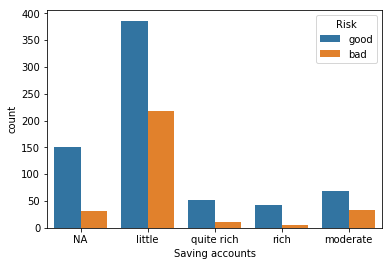

In [20]:
sns.countplot(x = 'Saving accounts', data= data, hue ="Risk")

In [21]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

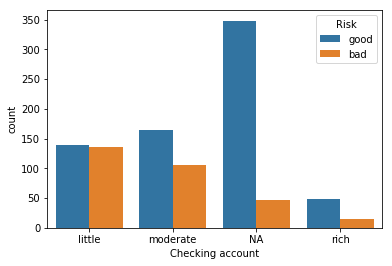

In [22]:
# People with moderate and little account are likely to more in risk. 
sns.countplot(x = 'Checking account', data= data, hue ="Risk")

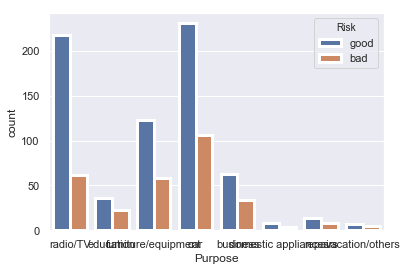

In [23]:
sns.set(style="darkgrid")
sns.countplot(x = 'Purpose', data= data, hue ="Risk", 
                       linewidth=3,
                       )

In [24]:
data['Saving accounts'].value_counts()

little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [25]:
data['Checking account'].value_counts()

NA          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

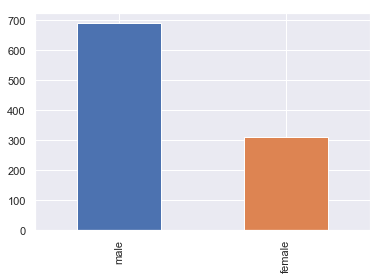

In [26]:
data["Sex"].value_counts().plot(kind = "bar")

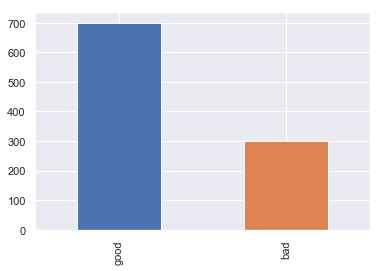

In [27]:
# this is the problem of class imbalance from the chart it is easily can understandable that male are in majority
#and females are in moniority so this will affect on our prediction value and may cause to misclassification  
data.Risk.value_counts().plot(kind='bar')

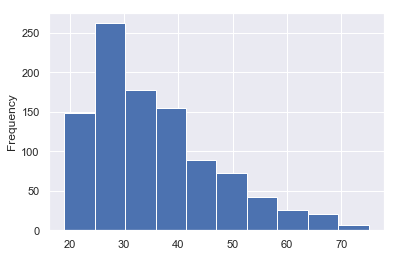

In [28]:
# we have the more peoples who are in between (20-30)
data["Age"].plot.hist(bins=10)

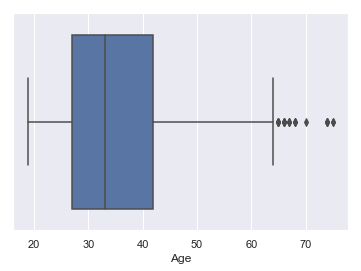

In [29]:
#CHECKING THE OUTLIER
sns.boxplot(x="Age", data=data)
# Age 75 and 19 both are possible 

In [30]:
data["Age"].max()

75

In [31]:
data["Age"].min()

19

In [32]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

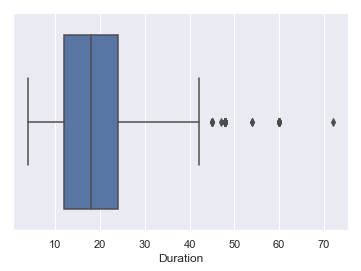

In [33]:
sns.boxplot(x='Duration', data=data)

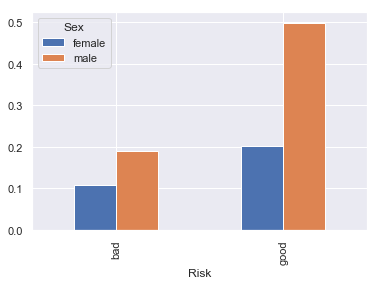

In [34]:
# Cross Varification 
pd.crosstab(data['Risk'], data['Sex'],normalize=True).plot(kind='bar')

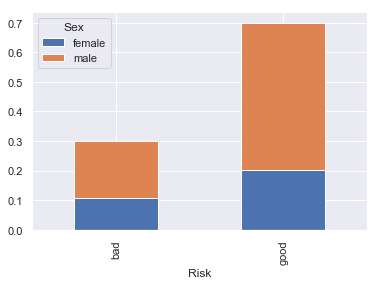

In [35]:
pd.crosstab(data['Risk'], data['Sex'],normalize=True).plot(kind='bar', stacked=True)

In [36]:
#Whether bad Risk make more duration then good Risk 
data.groupby('Risk')['Duration'].mean()

Risk
bad     24.860000
good    19.207143
Name: Duration, dtype: float64

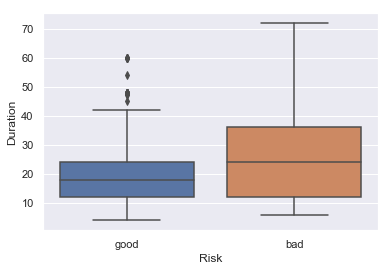

In [37]:
sns.boxplot( x=data["Risk"], y=data["Duration"] );
plt.show()

In [38]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [39]:
ov=pd.crosstab(data['Risk'],data['Risk'])

In [40]:
ov

Risk,bad,good
Risk,,
bad,300,0
good,0,700


<b>Label Encoding

In [41]:
data["Sex"] = data["Sex"].replace(["male","female"],[0,1])

In [42]:
data["Sex"].value_counts()

0    690
1    310
Name: Sex, dtype: int64

In [43]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,own,NA,little,1169,6,radio/TV,good
1,22,1,2,own,little,moderate,5951,48,radio/TV,bad
2,49,0,1,own,little,NA,2096,12,education,good
3,45,0,2,free,little,little,7882,42,furniture/equipment,good
4,53,0,2,free,little,little,4870,24,car,bad


In [44]:
data["Risk"] = data["Risk"].replace(["good","bad"],[0,1])

In [45]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,own,NA,little,1169,6,radio/TV,0
1,22,1,2,own,little,moderate,5951,48,radio/TV,1
2,49,0,1,own,little,NA,2096,12,education,0
3,45,0,2,free,little,little,7882,42,furniture/equipment,0
4,53,0,2,free,little,little,4870,24,car,1


In [46]:
data["Saving accounts"].value_counts()

little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [47]:
data["Checking account"].value_counts()

NA          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [48]:
# As we see in the above People with moderate and little account are likely to more in risk.
# we will merge the quite rich rich and NA into single category and make it into 3. 
# 'Saving Account'

data['Saving accounts']= data['Saving accounts'].map({'little': 'little', 'moderate': 'moderate', 'quite rich':'other','rich':'other', 'NA':'other' })

In [49]:
data["Saving accounts"].value_counts()

little      603
other       294
moderate    103
Name: Saving accounts, dtype: int64

In [50]:
# 'Checking Account'
data['Checking account']= data['Checking account'].map({'little': 'little', 'moderate': 'moderate','rich':'other', 'NA':'other' })

In [51]:
data["Checking account"].value_counts()

other       457
little      274
moderate    269
Name: Checking account, dtype: int64

In [52]:
lbl_enc = LabelEncoder()
data["Purpose"]= lbl_enc.fit_transform(data["Purpose"])

In [53]:
data.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,own,other,little,1169,6,5,0
1,22,1,2,own,little,moderate,5951,48,5,1


In [54]:
data.describe(include="object")

,Housing,Saving accounts,Checking account
count,1000,1000,1000
unique,3,3,3
top,own,little,other
freq,713,603,457


In [55]:
print("These are the Labels: \n",lbl_enc.classes_.tolist())

These are the Labels: 
 ['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others']


In [56]:
data["Purpose"].unique().tolist()

[5, 3, 4, 1, 0, 2, 6, 7]

<b> Class Imbalance Problem

In [57]:
data.Risk.value_counts()

0    700
1    300
Name: Risk, dtype: int64

The common method for dealing with class imbalance problem is data sampling . Using data sampling, the data is balanced by adding samples to minority class called over sampling or removing the samples from the majority class called under-sampling

There are many Different techniques to takle the Imbalance problem. 
 
1. Can You Collect More Data?
2. Try Changing Your Performance Metric
3. Try Resampling Your Dataset
4. Try Generate Synthetic Samples
5. Try Different Algorithms and others.

Here i will use the resampling method 


In [58]:
from sklearn.utils import resample

In [59]:
majority_data = data[data.Risk==0]
minority_data = data[data.Risk==1]

In [60]:
majority_data.shape

(700, 10)

In [61]:
minority_data.shape

(300, 10)

In [62]:
minority_data_sampled = resample(minority_data, replace = True, n_samples =  600, random_state = 666)

In [63]:
minority_data_sampled.shape

(600, 10)

In [64]:
# now we will combine all the minority all majority
data_sampled = pd.concat([majority_data, minority_data_sampled])

In [65]:
data_sampled.Risk.value_counts()

0    700
1    600
Name: Risk, dtype: int64

In [66]:
data_sampled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,own,other,little,1169,6,5,0
2,49,0,1,own,little,other,2096,12,3,0
3,45,0,2,free,little,little,7882,42,4,0
5,35,0,1,free,other,other,9055,36,3,0
6,53,0,2,own,other,other,2835,24,4,0


In [67]:
x = data_sampled.drop("Risk", axis=1)

In [68]:
y=data_sampled.Risk

In [69]:
x.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,0,2,own,other,little,1169,6,5
2,49,0,1,own,little,other,2096,12,3
3,45,0,2,free,little,little,7882,42,4
5,35,0,1,free,other,other,9055,36,3
6,53,0,2,own,other,other,2835,24,4


In [70]:
y.head()

0    0
2    0
3    0
5    0
6    0
Name: Risk, dtype: int64

In [71]:
# categorical column
cat_col = list(x.columns[x.dtypes == 'object'])

# numerical Column
num_col = list(x.columns[x.dtypes!='object'])

In [72]:
cat_col

['Housing', 'Saving accounts', 'Checking account']

In [73]:
num_col

['Age', 'Sex', 'Job', 'Credit amount', 'Duration', 'Purpose']

In [74]:
x_dummy =  pd.get_dummies(x[cat_col], drop_first=True)

# concatenate the cat variables and numerical varib

x_new = pd.concat([x_dummy, x[num_col]], axis=1, join = "inner")

# now we have all the data into numerical for

In [75]:
x_new.head()

,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_other,Checking account_moderate,Checking account_other,Age,Sex,Job,Credit amount,Duration,Purpose
0,1,0,0,1,0,0,67,0,2,1169,6,5
2,1,0,0,0,0,1,49,0,1,2096,12,3
3,0,0,0,0,0,0,45,0,2,7882,42,4
5,0,0,0,1,0,1,35,0,1,9055,36,3
6,1,0,0,1,0,1,53,0,2,2835,24,4


In [76]:
# second step to standarize the data into uniform scale so we have studied three different kind of techniques i am using standard scaling
import warnings
warnings.filterwarnings("ignore")
ss= StandardScaler()
x_normal = ss.fit_transform(x_new)

In [77]:
# Now data is in between 1 to -1 range
x_normal

array([[ 0.66305778, -0.47947464, -0.34041126, ..., -0.75581034,
        -1.29491488,  1.09784275],
       [ 0.66305778, -0.47947464, -0.34041126, ..., -0.4555819 ,
        -0.81323544,  0.09348274],
       [-1.50816418, -0.47947464, -0.34041126, ...,  1.41833586,
         1.59516172,  0.59566274],
       ...,
       [-1.50816418, -0.47947464, -0.34041126, ..., -0.74641808,
        -1.29491488,  0.09348274],
       [ 0.66305778, -0.47947464, -0.34041126, ...,  0.95714352,
        -0.33155601, -0.91087727],
       [ 0.66305778, -0.47947464, -0.34041126, ..., -0.50999223,
        -0.33155601,  0.59566274]])

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_normal, y, test_size=0.3, random_state = 10)

In [79]:
x_train.shape

(910, 12)

In [80]:
x_test.shape

(390, 12)

In [81]:
y_train.shape

(910,)

In [82]:
y_test.shape

(390,)

In [112]:
# Making the list of all classifeir and appending all the classifier into a models list so that at a one go i can easily used it
SEED = 600
models = []

models.append(('LogisticRegreesion', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('Navie Bayes Gussian', GaussianNB()))
models.append(('Navie Bayes Bernouli', BernoulliNB()))
models.append(('SVC', SVC()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))

<b> From the Given Accuracy you have noticed that Random forest Decision Tree and Gradient Boosting have the high Accuracy, precision and recall so the best practice and learned that if a model have accuracy higher then 70 is consider to a good model so we can select the model which have not less then 70 accuracy and nor more the 80 because when we select higher accurate model there may be chances to overfiiting and generalization issues selecting average model will help us in simplifying the business problem and better explainability and we have a choice now either we select logistic regreesion or SVC both are better model for our problem. 

In [113]:
result = []
model_names = []
scoring = ['accuracy','recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10, random_state=SEED)
    cv_results1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (model_name, cv_results1.mean(),cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)

LogisticRegreesion:
 ACCURACY = 0.728571, RECALL=(0.745352), PRECISION=(0.693722), ROC-AUC=(0.788369)
KNN:
 ACCURACY = 0.710989, RECALL=(0.716150), PRECISION=(0.680877), ROC-AUC=(0.779091)
SGD:
 ACCURACY = 0.623077, RECALL=(0.624093), PRECISION=(0.645354), ROC-AUC=(0.661715)
DecisionTree:
 ACCURACY = 0.797802, RECALL=(0.855634), PRECISION=(0.742593), ROC-AUC=(0.798601)
Navie Bayes Gussian:
 ACCURACY = 0.705495, RECALL=(0.690992), PRECISION=(0.678157), ROC-AUC=(0.777439)
Navie Bayes Bernouli:
 ACCURACY = 0.693407, RECALL=(0.711299), PRECISION=(0.655411), ROC-AUC=(0.773326)
SVC:
 ACCURACY = 0.754945, RECALL=(0.775725), PRECISION=(0.719847), ROC-AUC=(0.827039)
RandomForest:
 ACCURACY = 0.828571, RECALL=(0.830673), PRECISION=(0.816104), ROC-AUC=(0.895339)
AdaBoost:
 ACCURACY = 0.757143, RECALL=(0.767920), PRECISION=(0.724994), ROC-AUC=(0.799843)
GradientBoosting:
 ACCURACY = 0.780220, RECALL=(0.798845), PRECISION=(0.749168), ROC-AUC=(0.850854)


|**Model/Classifier Name**| **Train Accuracy**| **Recall**|**Precision**|**ROC-AUC**|
|:-------------------:|:-----------------:|:--------------:|:------------:|---------|
| Logistic Regression |      72% |               74% |         69%       |   78%   |
| KNN |      71% |               71% |         68%       |   77%   |
| SGD |      64% |               53% |         63%       |   66%   |
| DecisionTree |      80% |               85% |         75%       |   80%   |
| SVM/SVC |      75% |               77% |         71%       |   82%   |
| RandomForest |      82% |               82% |         79%       |   89%   |
| AdaBoost |      75% |               76% |         72%       |   79%   |
| GradientBoosting |      78% |               80% |         74%       |   85%   |
| Navie Bayes Gussian| 70% | 69% | 67% | 77% |
| Navie Bayes Bernouli| 69% | 71% | 65% | 77% |

# Model Selection and Evaluation 

In [85]:
logistReg = LogisticRegression()
ModelLR = logistReg.fit(x_train,y_train)

In [86]:
y_predLR = ModelLR.predict(x_test)

From the confusion Matrix what we are getting actually as we discussed more on this confusion matrix in class about the True and False value classification so from the confusion matrix a diagonally results mean 153 and 122 are classified as True and prediction of the values also True and other means 58 and 57 are false classified it means this is the wrong prediction of our model we can also calculate the all values just like Precision recall, False and True rate of our model. so as accuracy have the formula TP + TN/ All classified value so the Accuracy will be 70.51% and below in the print lines just simple calculation of on the basis of Confusion matrix.

In [87]:
cMatrix = confusion_matrix(y_test, y_predLR)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

[[153  58]
 [ 57 122]]
Transactions which were falsely classified as FRAUD =  14.9 Percent
Transactions which were falsely classified as NOT-FRAUD = 14.6 Percent
Transactions which were truly classified as FRAUD = 31.3 Percent
Transactions which were truly classified as NOT-FRAUD = 39.2 Percent


In [88]:
# Print the prediction accuracy
from sklearn.metrics import roc_curve
accuracy = metrics.accuracy_score(y_test, y_predLR)
confusion_matrix = metrics.confusion_matrix(y_test, y_predLR)
classification = metrics.classification_report(y_test, y_predLR)
fpr1 , tpr1, _ = roc_curve(y_test, y_predLR)
print()
print('============================== Model Evaluation =============================='.format())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 


============================== Model Evaluation ==============================

Model Accuracy:
 0.7051282051282052

Confusion matrix:
 [[153  58]
 [ 57 122]]

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       211
           1       0.68      0.68      0.68       179

   micro avg       0.71      0.71      0.71       390
   macro avg       0.70      0.70      0.70       390
weighted avg       0.71      0.71      0.71       390



# HyperParameter Tunning

In [89]:
from sklearn.model_selection import GridSearchCV as gs
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 
#LogisticRegreesion with grid search
clf_LR=LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

clf=gs(estimator=clf_LR,param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0 )
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

In [90]:
print("Accuracy of LogisticRegression (%): \n", accuracy_score(y_test, predictions)*100)#get FPR (specificity) and TPR (sensitivity)
fpr2 , tpr2, _ = roc_curve(y_test, predictions)
print("AUC of LogisticRegression (%): \n",auc(fpr2, tpr2)*100)
print("Precision: \n",precision_score(y_test, predictions)*100)
print("Recall (%): \n",recall_score(y_test, predictions)*100)
# examine the best model
# Single best score achieved across all params (min_samples_split)
print("Best Score (%): \n",clf.best_score_*100)
# Dictionary containing the parameters (min_samples_split) used to generate that score
print("Best Parametres : \n", clf.best_params_)
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best Estimator : \n", clf.best_estimator_)

Accuracy of LogisticRegression (%): 
 70.76923076923077
AUC of LogisticRegression (%): 
 70.57110328576344
Precision: 
 68.15642458100558
Recall (%): 
 68.15642458100558
Best Score (%): 
 73.07692307692307
Best Parametres : 
 {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Estimator : 
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [91]:
from sklearn.model_selection import RandomizedSearchCV as rs
#LogisticRegression with random search

clf_LR=LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)


clf=rs(estimator=clf_LR,param_distributions=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print("Accuracy of LogisticRegression (%): \n", accuracy_score(y_test, predictions)*100)#get FPR (specificity) and TPR (sensitivity)
fpr3 , tpr3, _ = roc_curve(y_test, predictions)
print("AUC of LogisticRegression (%): \n",auc(fpr3, tpr3)*100)
print("Precision: \n",precision_score(y_test, predictions)*100)
print("Recall (%): \n",recall_score(y_test, predictions)*100)
# examine the best model
# Single best score achieved across all params (min_samples_split)
print("Best Score (%): \n",clf.best_score_*100)
# Dictionary containing the parameters (min_samples_split) used to generate that score
print("Best Parametres : \n", clf.best_params_)
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best Estimator : \n", clf.best_estimator_)

Accuracy of LogisticRegression (%): 
 70.76923076923077
AUC of LogisticRegression (%): 
 70.57110328576344
Precision: 
 68.15642458100558
Recall (%): 
 68.15642458100558
Best Score (%): 
 73.07692307692307
Best Parametres : 
 {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Best Estimator : 
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


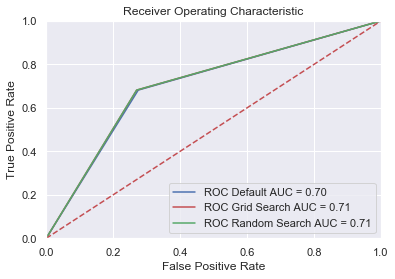

In [92]:
#plotting the ROC for all three models with different hyperparametres
import sklearn.metrics as metrics
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
# method I: plt
import matplotlib.pyplot as plt
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'ROC Default AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r', label = 'ROC Grid Search AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'g', label = 'ROC Random Search AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
# second classifier is SVC so 
C_SVC = SVC()
modelSVC = C_SVC.fit(x_train,y_train)

In [94]:
y_predSVC = modelSVC.predict(x_test)

In [95]:
cMatrix = confusion_matrix(y_test, y_predSVC)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

[[158  53]
 [ 48 131]]
Transactions which were falsely classified as FRAUD =  13.6 Percent
Transactions which were falsely classified as NOT-FRAUD = 12.3 Percent
Transactions which were truly classified as FRAUD = 33.6 Percent
Transactions which were truly classified as NOT-FRAUD = 40.5 Percent


In [96]:
# Print the prediction accuracy
accuracy = metrics.accuracy_score(y_test, y_predSVC)
confusion_matrix = metrics.confusion_matrix(y_test, y_predSVC)
classification = metrics.classification_report(y_test, y_predSVC)
fpr1 , tpr1, _ = roc_curve(y_test, y_predSVC)

print()
print('============================== Model Evaluation =============================='.format())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 


============================== Model Evaluation ==============================

Model Accuracy:
 0.7410256410256411

Confusion matrix:
 [[158  53]
 [ 48 131]]

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       211
           1       0.71      0.73      0.72       179

   micro avg       0.74      0.74      0.74       390
   macro avg       0.74      0.74      0.74       390
weighted avg       0.74      0.74      0.74       390



In [97]:
from sklearn.model_selection import GridSearchCV as gs
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 
#SVC with grid search hyperPerameter Tunning
clf_SVC=SVC()
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# define grid search

clf=gs(estimator=clf_SVC,param_grid=param_grid, refit=True,verbose=2 )
clf.fit(x_train, y_train)
predictionsSVC = clf.predict(x_test)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] 

[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .

[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   19.4s finished


These are the best hyperparameter for SVM/SVC classifier 

In [98]:
print(clf.best_estimator_)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [99]:
print("Accuracy of SVC (%): \n", accuracy_score(y_test, predictionsSVC)*100)#get FPR (specificity) and TPR (sensitivity)
fpr2 , tpr2, _ = roc_curve(y_test, predictionsSVC)
print("AUC of SVC (%): \n",auc(fpr2, tpr2)*100)
print("Precision: \n",precision_score(y_test, predictionsSVC)*100)
print("Recall (%): \n",recall_score(y_test, predictionsSVC)*100)
# examine the best model
# Single best score achieved across all params (min_samples_split)
print("Best Score (%): \n",clf.best_score_*100)
# Dictionary containing the parameters (min_samples_split) used to generate that score
print("Best Parametres : \n", clf.best_params_)
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best Estimator : \n", clf.best_estimator_)

Accuracy of SVC (%): 
 86.15384615384616
AUC of SVC (%): 
 85.8058195874924
Precision: 
 87.42514970059881
Recall (%): 
 81.56424581005587
Best Score (%): 
 76.5934065934066
Best Parametres : 
 {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Estimator : 
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [100]:
from sklearn.model_selection import RandomizedSearchCV as rs
#SVC with random search

clf_SVC=SVC()
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


clf=rs(estimator=clf_SVC,param_distributions=param_grid, refit=True,verbose=2)
clf.fit(x_train, y_train)
predictionsSVC = clf.predict(x_test)
print("Accuracy of SVC (%): \n", accuracy_score(y_test, predictionsSVC)*100)#get FPR (specificity) and TPR (sensitivity)
fpr3 , tpr3, _ = roc_curve(y_test, predictionsSVC)
print("AUC of SVC (%): \n",auc(fpr3, tpr3)*100)
print("Precision: \n",precision_score(y_test, predictionsSVC)*100)
print("Recall (%): \n",recall_score(y_test, predictionsSVC)*100)
# examine the best model
# Single best score achieved across all params (min_samples_split)
print("Best Score (%): \n",clf.best_score_*100)
# Dictionary containing the parameters (min_samples_split) used to generate that score
print("Best Parametres : \n", clf.best_params_)
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best Estimator : \n", clf.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] ..................... kernel=rbf, gamma=0.1, C=100, total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=100 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... kernel=rbf, gamma=0.1, C=100, total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=100 ....................................
[CV] ..................... kernel=rbf, gamma=0.1, C=100, total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=1 ......................................
[CV] ....................... kernel=rbf, gamma=0.1, C=1, total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=1 ......................................
[CV] ....................... kernel=rbf, gamma=0.1, C=1, total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=1 ......................................
[CV] ....................... kernel=rbf, gamma=0.1, C=1, total=   0.0s
[CV] kernel=poly, gamma=0.001, C=1 ...................................
[CV] .................... kernel=poly, gamma=0.001, C=1, total=   0.0s
[CV] kernel=poly, gamma=0.001, C=1 ...................................
[CV] .................... kernel=poly, gamma=0.001, C=1, total=   0.0s
[CV] kernel=poly, gamma=0.001, C=1 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.2s finished


An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.

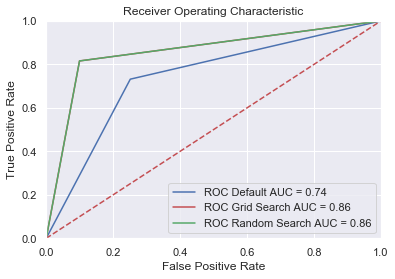

In [101]:
#plotting the ROC for all three models with different hyperparametres
import sklearn.metrics as metrics
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
# method I: plt
import matplotlib.pyplot as plt
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'ROC Default AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r', label = 'ROC Grid Search AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'g', label = 'ROC Random Search AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Learning Curves

In [102]:
train_sizes =  [100,200, 400, 600]
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
estimator = SVC(kernel='linear'),
X = x_train ,
y = y_train, train_sizes = train_sizes, cv = 5, shuffle=True,
scoring = 'f1')

In [103]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[0.78431373 0.78846154 0.79207921 0.75609756 0.60759494]
 [0.76616915 0.8        0.75268817 0.79187817 0.68156425]
 [0.77294686 0.74801061 0.72979215 0.7314578  0.71428571]
 [0.71356784 0.73170732 0.73035439 0.74636511 0.71821306]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.66666667 0.73846154 0.73298429 0.63276836 0.67901235]
 [0.71910112 0.7486631  0.75977654 0.69273743 0.7032967 ]
 [0.74074074 0.73142857 0.71921182 0.7032967  0.70652174]
 [0.72316384 0.72727273 0.71921182 0.73796791 0.70652174]]


In [104]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 100    0.745709
200    0.758460
400    0.739299
600    0.728042
dtype: float64

 --------------------

Mean validation scores

 100    0.689979
200    0.724715
400    0.720240
600    0.722828
dtype: float64


(0, 1)

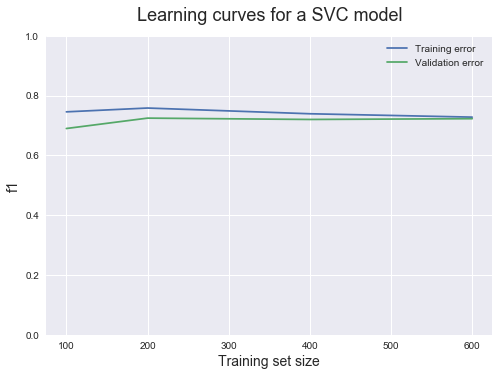

In [105]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('f1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a SVC model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)

In [106]:
#we can also set the precision as well. 
train_sizes =  [100,200, 400, 600]
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
estimator = SVC(kernel='linear'),
X = x_train ,
y = y_train, train_sizes = train_sizes, cv = 5, shuffle=True,
scoring = 'precision')

In [107]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[0.75       0.67164179 0.63636364 0.6969697  0.8       ]
 [0.66917293 0.70909091 0.66071429 0.67768595 0.68181818]
 [0.63346614 0.67873303 0.67475728 0.6468254  0.62301587]
 [0.68307692 0.6595092  0.62533693 0.6918239  0.67301587]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.69117647 0.63157895 0.64179104 0.58064516 0.6746988 ]
 [0.65789474 0.67676768 0.67       0.66346154 0.65      ]
 [0.65789474 0.67032967 0.69072165 0.625      0.61538462]
 [0.69565217 0.67032967 0.61344538 0.68627451 0.65      ]]


In [108]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 100    0.710995
200    0.679696
400    0.651360
600    0.666553
dtype: float64

 --------------------

Mean validation scores

 100    0.643978
200    0.663625
400    0.651866
600    0.663140
dtype: float64


(0, 1)

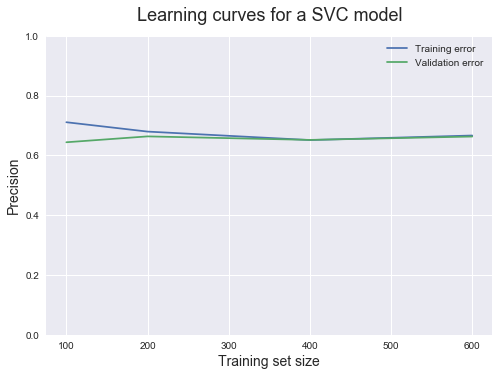

In [109]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Precision', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a SVC model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)

|**Model**| **Train Accuracy**| **Test Accuracy**|
|:-------:|:-----------------:|:--------------:|
| Logistic Regression |  72% | 70% |
|SVC | 75% | 74% |